
# Project: TMDB MOVIE DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we are going to be analyzing a movie dataset to discover the relationship between movies with high budget and high rating. The data is originally a Kaggle dataset and has certian columns which contain more than one options which is seperated with a pipe(|). The columns are self explanatory and are as detailed below.

 * 0  - id                    This is the identification number
 * 1  - imdb_id               The IMDB unique identifier
 * 2  - popularity            How popular the movie is in numeric terms.
 * 3  - budget                Amount to be spent/spent 
 * 4  - revenue               Amount generated 
 * 5  - original_title        Title of the movie 
 * 6  - cast                  Details of actors/actress  
 * 7  - homepage              Movie webpage
 * 8  - director              Movie director
 * 9  - tagline               unique to each movie 
 * 10 - keywords              words associated with the movie
 * 11 - overview              introduction to the movie.Gives the synopsis
 * 12 - runtime               Total movie time 
 * 13 - genres                movie category
 * 14 - production_companies  companies involved in producing the movie
 * 15 - release_date          Date movie was released
 * 16 - vote_count            numeric count of votes 
 * 17 - vote_average          average vote count
 * 18 - release_year          year movie was released
 * 19 - budget_adj            the budget of the associated movie in terms of 2010 dollars, accounting for inflation                                  over time
 * 20 - revenue_adj           the revenue of the associated movie in terms of 2010 dollars, accounting for inflation                                over time


### Question(s) for Analysis
We would answer the below questions in the course of investigating this dataset.
* What is the title of the most popular movie?
* What is the corelation between movie revenue and ratings?
* Do movies with high bubget generate more revenue than those with lower budget(What is the corelation)?
* What kind of properties are associatied with movies with high revenue?




### Importing Packages to be used

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2239 lines of output]
      /private/var/folders/w3/hcqm2jk94379vwkn7zzjxns40000gn/T/pip-install-42blsmzk/pandas_085b8aa9fba6435f90937c79a3915942/setup.py:53: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        _CYTHON_INSTALLED = ver >= LooseVersion(min_cython_ver)
      /private/var/folders/w3/hcqm2jk94379vwkn7zzjxns40000gn/T/pip-install-42blsmzk/pandas_085b8aa9fba6435f90937c79a3915942/setup.py:487: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
        LooseVersion(python_target) < "10.9"
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-3.9
      creating build/lib.macosx-10.9-x86_64-3.9/pandas
     

<a id='wrangling'></a>
## Data Wrangling

#### Loading our Dataset using the read_csv function

In [3]:
# Load your data and print out a few lines using the head() method.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Prints out the shape of the dataset(Number of rows and columns)
print(df.shape)

(10866, 21)


In [5]:
# Details about the data and checking for columns with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# checking the data type
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# the descirbe function shows the statistical distribution of the data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# confirm the columns with null values and the total number of null for each column
print(df.isnull().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


In [9]:
# check for duplicated values
sum(df.duplicated())

1

In [10]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Assessing Data Types

The data set contains 1 duplicate value, and the below columns have null values:
* imdb_id
* cast
* homepage
* director
* tagline
* keywords
* overview
* genres
* production companies

A couple of the colums have more than one values which as earlier mentioned in the introduction and will be used that way since it will have no negative impact on the questions posed for this analysis while some columns are irrelevant to the analysis.


### Data Cleaning
In this section, rows with null values will be dropped as this signifies incomplete data which when used may affect the results of an analysis and lead to wrong interpretation. We will also drop duplicate values to avoid using repitive information. We also be droping columns that we do not have significant impact to our analysis.

In [11]:
# drop unnnecessary columns
df.drop(['tagline', 'homepage', 'overview', 'keywords', 'imdb_id', 'production_companies'], axis=1, inplace=True)

In [12]:
# confirm successfull droping of columns
print(df.shape)

(10866, 15)


Columns successfully dropped from 21 to 15

In [13]:
# Confirm columns with null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [14]:
# A brief overview of columns with null values 
# to determine if dropping will adversely affect analysis
df[df['cast'].isnull()].head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015,0.0,0.0
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015,0.0,0.0
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015,0.0,0.0
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,12,8.0,2015,0.0,0.0
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,11,8.9,2015,0.0,0.0


A review of the sample above shows that there are a lot of zero values in the budget and revenue colums which is a significant column in our analysis. We will go ahead to drop the null values it will not have much effect in our analysis. 

In [15]:
df[df['genres'].isnull()].head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.0,0.0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.0,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009,0.0,0.0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009,0.0,0.0


In [16]:
df[df['director'].isnull()].head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015,0.0,0.0
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.0,0.0
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015,0.0,0.0
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,32,6.3,2014,0.0,0.0
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,11,7.2,2014,0.0,0.0


It seems the above two columns are quite similar to the review on the cast column in that they both seem to have zero values in the budget and revenue columns. Overall the total values of null is quite low compared to the total value of rows.

In [17]:
# drop rows with null values in the dataset
df.dropna(inplace=True)

In [18]:
# A quick glance at the data set to confirm the organization of the data
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
# check if any null values still exist, should be false
df.isnull().sum().any()

False

In [20]:
# drop duplicates in the dataset
# There is only 1 duplicate in this dataset
df.drop_duplicates(inplace=True)

In [21]:
# print df again to confirm dedupe, should be 0
print(df.duplicated().sum())

0


In [22]:
# final glance at the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
 13  budget_adj      10731 non-null  float64
 14  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the Title of the most popular movie?

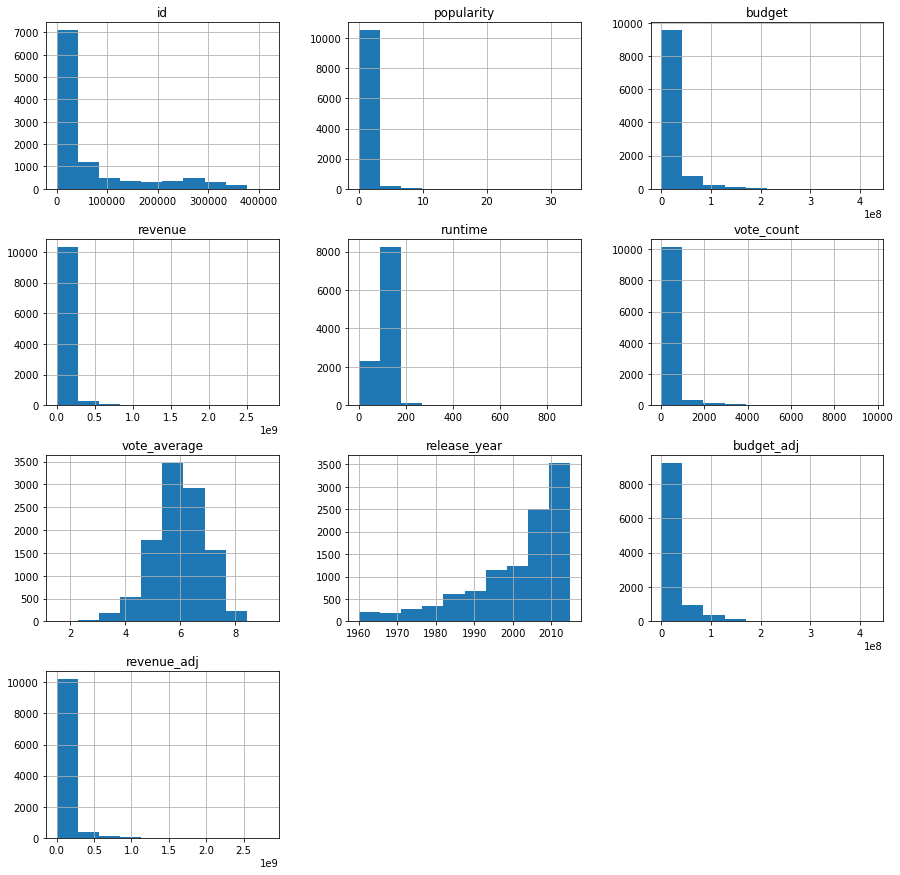

In [23]:
# Quick exploration of the data distribution using visuals
df.hist(figsize=(15,15));

In [24]:
pop_by_title = df[['original_title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
pop_by_title

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


The above shows the top 10 popular movies in descending order

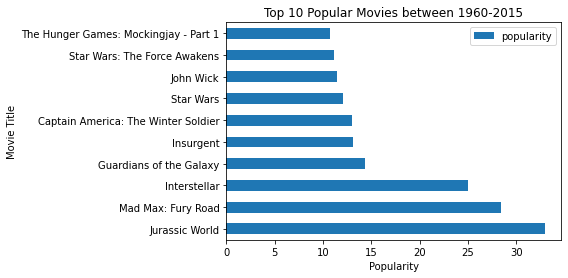

In [42]:
pop_title = pop_by_title.set_index('original_title').plot(kind='barh')
pop_title.set_ylabel('Movie Title')
pop_title.set_xlabel('Popularity')
pop_title.set_title('Top 10 Popular Movies between 1960-2015')

plt.show();

#### The vizualization above shows that the most popular movie title in the year range of 1960-2015 is Jurassic world.

### Research Question 2 What is the corelation between movie revenue and ratings(vote_count)?

In [56]:
def create_plot(x,y,kind,title):
    df.plot(x=x, y=y, kind ='scatter',title='Corelation Between Revenue and Voting')
    plt.show();

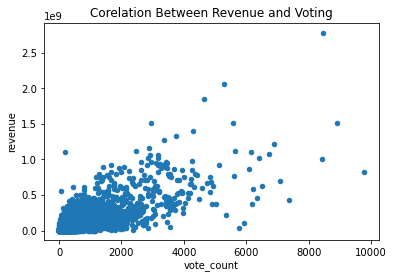

In [58]:
create_plot(x='vote_count', y='revenue', kind='scatter',title='Corelation Between Revenue and Voting');

#### The vizualizations shows that there is litle to no corelation between vote count and revenue. Increased count does not mean increased revenue. However, there are some outliers in the plot. Overall, vote count alone cannot be used to decide revenue generated.

### Research Question 3 Do movies with high bubget generate more revenue than those with lower budget(What is the corelation)?

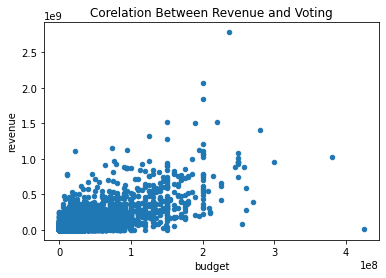

In [59]:
create_plot(x='budget', y='revenue', kind='scatter',title='Corelation Between Revenue and Budget');

#### The vizualization above shows that high budget does not translate to high revenue. The vizualization was plotted on a logarithmic scale which increases a value by a factor of the base in order to understand clearly if high budget actually affects revenue.

### Research Question 4 What kind of properties are associatied with movies with high revenue?

#### To answer this question, i will be analysing the following columns: budget and popularity

In [44]:
# We will create a data frame that will comprise movies with either high or low revenue
# high revenue are for movies with revenue above the mean and vice versa for low revenue

avg_revenue = df['revenue'].mean()
avg_revenue

40319887.588016026

In [45]:
# print data that is equal to or greater than the average revenue
df_high_rev = df.query('revenue >= 40319887.588016026')
df_high_rev

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,8469,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,109,Comedy,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08
10761,6081,1.090065,0,49579269,Revenge of the Pink Panther,Peter Sellers|Andrew Sachs|Herbert Lom|Burt Kw...,Blake Edwards,104,Action|Comedy|Thriller|Crime|Family,7/19/78,56,6.2,1978,0.000000e+00,1.657287e+08
10762,11778,0.959754,15000000,50000000,The Deer Hunter,Robert De Niro|John Cazale|John Savage|Christo...,Michael Cimino,183,Drama|War,12/8/78,464,7.4,1978,5.014051e+07,1.671350e+08
10764,11455,0.608679,0,41590893,Up in Smoke,Cheech Marin|Tommy Chong|Strother Martin|Edie ...,Lou Adler,86,Comedy,1/1/78,103,6.5,1978,0.000000e+00,1.390259e+08


In [46]:
# print data that less than the average revenue
df_low_rev = df.query('revenue < 40319887.588016026')
df_low_rev

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
12,264660,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,1/21/15,2854,7.6,2015,1.379999e+07,3.391985e+07
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
35,264644,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117,Drama|Thriller,10/16/15,1520,8.0,2015,5.519998e+06,3.256960e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
42,321697,3.079522,30000000,34441873,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,Danny Boyle,122,History|Drama,10/9/15,1035,6.9,2015,2.759999e+07,3.168651e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### The Budget

In [47]:
## Let's check out the mean high revenue data
df_high_rev.groupby(['revenue'])['budget'].mean()

revenue
40346186       30000000.0
40382659       32000000.0
40400657       28000000.0
40423945        3500000.0
40442437              0.0
                 ...     
1513528810    150000000.0
1519557910    220000000.0
1845034188    200000000.0
2068178225    200000000.0
2781505847    237000000.0
Name: budget, Length: 2134, dtype: float64

In [48]:
## let's do same as above for the low revenue
df_low_rev.groupby(['revenue'])['budget'].mean()

revenue
0           2.630276e+06
2           6.000000e+06
3           6.666667e+04
5           7.500005e+06
6           1.570000e+07
                ...     
40222729    3.200000e+07
40263020    3.500000e+07
40270895    2.200000e+07
40272135    1.180000e+07
40283321    1.500000e+07
Name: budget, Length: 2564, dtype: float64

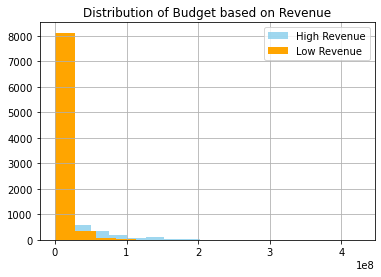

In [49]:
# the below checks the distribution of the budget 
df_high_rev['budget'].hist(bins= 15, label='High Revenue', alpha=0.8, color='skyblue')
df_low_rev['budget'].hist(bins= 15, label='Low Revenue', color='orange')
plt.legend()
plt.title('Distribution of Budget based on Revenue');

#### From the vizualization above, movies with low revenue seem to have a leaner budget distribution compared to the movies with high budget. Which means that movies with high revenue have higher budget.

In [60]:
## let's get the names of movies with high revenue 
title_by_rev = df_high_rev[['original_title', 'revenue']].sort_values(by='revenue', ascending=False).head()
title_by_rev 

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810


In [63]:
## let's get the names of movies with high budget 
title_by_bud = df_high_rev[['original_title', 'budget']].sort_values(by='budget', ascending=False).head()
title_by_bud 

,original_title,budget
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
4411,John Carter,260000000


#### There seems to be a limitation here. Although the histogram shows that movies with high budget are more likely to have higher revenue, the top five movies by revenue are not the top five in terms of high budget.

### Are we Popular or Not?

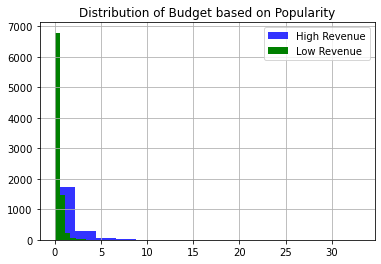

In [64]:
## A vizual showing the distribution of poularity based on Revenue

df_high_rev['popularity'].hist(bins= 15, label='High Revenue', alpha=0.8, color='blue')
df_low_rev['popularity'].hist(bins= 15, label='Low Revenue', color='green')

plt.legend()

plt.title('Distribution of Budget based on Popularity');

#### The vizual above shows that movies with higher revenue have higher popularity ratings 

<a id='conclusions'></a>
## Conclusions

The below summarizes the analysis of the Movie data set

1. The top 5 movies with highest budget are not among the top 5 with highest revenue
2. The most poular movie title is Jurrasic World
3. There seem to be no corelation between vote count and Revenue
4. There might be certain limitation with the dataset as the movie with low revenue have a budget of about 5 million compared to the movie with high revenue which has 52 plus million as budget. This shows a correlation which was not present in question 4. We believe that other factors might be contributing to this difference.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])